In [152]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn import metrics
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Exploration and Preprocessing
Visualising the data with pandas, seaborn and matplotlib

In [153]:
Df = pd.read_excel('CreditRisk_Data.xls')
Df.head(5)

,OBS#,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,...,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,RESPONSE
0,1,0,6,4,0,0,0,1,0,0,...,67.0,0,0,1,2,2,1,1,0,1
1,2,1,48,2,0,0,0,1,0,0,...,22.0,0,0,1,1,2,1,0,0,0
2,3,3,12,4,0,0,0,0,1,0,...,49.0,0,0,1,1,1,2,0,0,1
3,4,0,42,2,0,0,1,0,0,0,...,45.0,0,0,0,1,2,2,0,0,1
4,5,0,24,3,1,0,0,0,0,0,...,53.0,0,0,0,2,2,2,0,0,0


<Axes: >

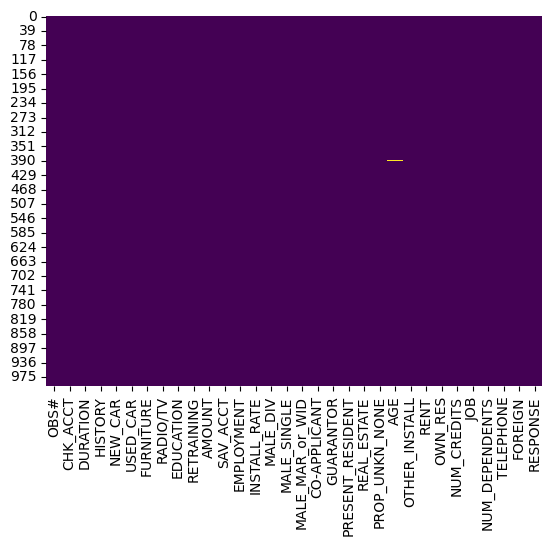

In [154]:
sns.heatmap(Df.isnull(), cbar=False, cmap="viridis")

In [155]:
Df.iloc[:,1]

0      0
1      1
2      3
3      0
4      0
      ..
995    3
996    0
997    3
998    0
999    1
Name: CHK_ACCT, Length: 1000, dtype: int64

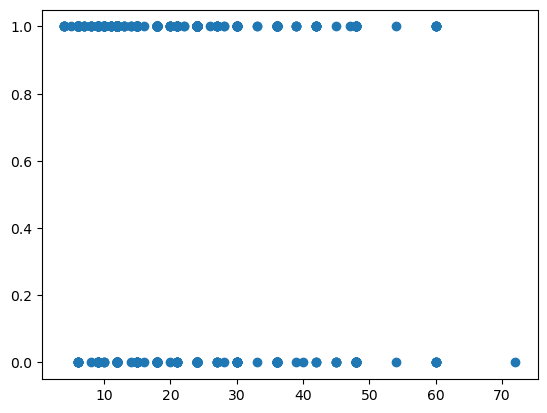

In [156]:
plt.scatter(Df.iloc[:,2], Df.iloc[:,31])

In [157]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   OBS#              1000 non-null   int64  
 1   CHK_ACCT          1000 non-null   int64  
 2   DURATION          1000 non-null   int64  
 3   HISTORY           1000 non-null   int64  
 4   NEW_CAR           1000 non-null   int64  
 5   USED_CAR          1000 non-null   int64  
 6   FURNITURE         1000 non-null   int64  
 7   RADIO/TV          1000 non-null   int64  
 8   EDUCATION         1000 non-null   int64  
 9   RETRAINING        1000 non-null   int64  
 10  AMOUNT            1000 non-null   int64  
 11  SAV_ACCT          1000 non-null   int64  
 12  EMPLOYMENT        1000 non-null   int64  
 13  INSTALL_RATE      1000 non-null   int64  
 14  MALE_DIV          999 non-null    float64
 15  MALE_SINGLE       1000 non-null   int64  
 16  MALE_MAR_or_WID   1000 non-null   int64  
 

### Removing Outliers
selection by observation of scatter plot of features vs responses

In [158]:
# column 2
Df = Df[Df.iloc[:, 2] < 55]
print(len(Df))

Df = Df[Df.iloc[:, 10] < 15000]
print(len(Df))

Df = Df[Df.iloc[:, 22] < 70]
print(len(Df))


986
982
974


### Data Cleaning

In [159]:
# Data cleaning
# removing NA values

Df_cleaned = Df.dropna()
Df_cleaned = Df_cleaned.reset_index(drop=True)
Df_cleaned.info()

# removing unnecesarry columns
Df_cleaned.drop(columns='OBS#', inplace=True)
Df_cleaned

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 972 entries, 0 to 971
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   OBS#              972 non-null    int64  
 1   CHK_ACCT          972 non-null    int64  
 2   DURATION          972 non-null    int64  
 3   HISTORY           972 non-null    int64  
 4   NEW_CAR           972 non-null    int64  
 5   USED_CAR          972 non-null    int64  
 6   FURNITURE         972 non-null    int64  
 7   RADIO/TV          972 non-null    int64  
 8   EDUCATION         972 non-null    int64  
 9   RETRAINING        972 non-null    int64  
 10  AMOUNT            972 non-null    int64  
 11  SAV_ACCT          972 non-null    int64  
 12  EMPLOYMENT        972 non-null    int64  
 13  INSTALL_RATE      972 non-null    int64  
 14  MALE_DIV          972 non-null    float64
 15  MALE_SINGLE       972 non-null    int64  
 16  MALE_MAR_or_WID   972 non-null    int64  
 1

,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,AMOUNT,...,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,RESPONSE
0,0,6,4,0,0,0,1,0,0,1169,...,67.0,0,0,1,2,2,1,1,0,1
1,1,48,2,0,0,0,1,0,0,5951,...,22.0,0,0,1,1,2,1,0,0,0
2,3,12,4,0,0,0,0,1,0,2096,...,49.0,0,0,1,1,1,2,0,0,1
3,0,42,2,0,0,1,0,0,0,7882,...,45.0,0,0,0,1,2,2,0,0,1
4,0,24,3,1,0,0,0,0,0,4870,...,53.0,0,0,0,2,2,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,3,12,2,0,0,1,0,0,0,1736,...,31.0,0,0,1,1,1,1,0,0,1
968,0,30,2,0,1,0,0,0,0,3857,...,40.0,0,0,1,1,3,1,1,0,1
969,3,12,2,0,0,0,1,0,0,804,...,38.0,0,0,1,1,2,1,0,0,1
970,0,45,2,0,0,0,1,0,0,1845,...,23.0,0,0,0,1,2,1,1,0,0


In [160]:
X_df = Df_cleaned.iloc[:,0:(len(Df_cleaned.columns)-1)]
Y_df = Df_cleaned.iloc[:,(len(Df_cleaned.columns)-1)]
Y_df.head(5)

0    1
1    0
2    1
3    1
4    0
Name: RESPONSE, dtype: int64

### Feature Selection
implementing a simple feature selction by removing features with low variance threshold

In [161]:
## Feature selection
selector = VarianceThreshold(threshold=0.04).set_output(transform="pandas")
X_df_new = selector.fit_transform(X_df)

# Get the features dropped
features_bool = selector.get_support()
X_columns = X_df.columns.to_list()
X_columns_dropped = []
for i in range(len(X_columns)):
    if features_bool[i] == False:
        X_columns_dropped.append(X_columns[i])

print(X_columns_dropped)
X_df = X_df_new
X_df

['CO-APPLICANT', 'FOREIGN']


,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,AMOUNT,...,REAL_ESTATE,PROP_UNKN_NONE,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE
0,0.0,6.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,1169.0,...,1.0,0.0,67.0,0.0,0.0,1.0,2.0,2.0,1.0,1.0
1,1.0,48.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,5951.0,...,1.0,0.0,22.0,0.0,0.0,1.0,1.0,2.0,1.0,0.0
2,3.0,12.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,2096.0,...,1.0,0.0,49.0,0.0,0.0,1.0,1.0,1.0,2.0,0.0
3,0.0,42.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,7882.0,...,0.0,0.0,45.0,0.0,0.0,0.0,1.0,2.0,2.0,0.0
4,0.0,24.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,4870.0,...,0.0,1.0,53.0,0.0,0.0,0.0,2.0,2.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,3.0,12.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1736.0,...,1.0,0.0,31.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
968,0.0,30.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,3857.0,...,0.0,0.0,40.0,0.0,0.0,1.0,1.0,3.0,1.0,1.0
969,3.0,12.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,804.0,...,0.0,0.0,38.0,0.0,0.0,1.0,1.0,2.0,1.0,0.0
970,0.0,45.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1845.0,...,0.0,1.0,23.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0


### Normalisation (Feature Scaling)
Min Max scaling of features

In [162]:
scaler = MinMaxScaler().set_output(transform="pandas")
scaler.fit(X_df) # calculates max and min to be used for scaling
print(scaler.data_max_)
print(scaler.data_min_)
X_Scaled = scaler.transform(X_df) # transforms features 
X_Scaled.head(5)

[3.0000e+00 5.4000e+01 4.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00
 1.0000e+00 1.0000e+00 1.0000e+00 1.4896e+04 4.0000e+00 4.0000e+00
 4.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 4.0000e+00
 1.0000e+00 1.0000e+00 6.8000e+01 1.0000e+00 1.0000e+00 1.0000e+00
 4.0000e+00 3.0000e+00 2.0000e+00 1.0000e+00]
[  0.   4.   0.   0.   0.   0.   0.   0.   0. 250.   0.   0.   1.   0.
   0.   0.   0.   1.   0.   0.  19.   0.   0.   0.   1.   0.   1.   0.]


,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,AMOUNT,...,REAL_ESTATE,PROP_UNKN_NONE,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE
0,0.000000,0.04,1.00,0.0,0.0,0.0,1.0,0.0,0.0,0.062748,...,1.0,0.0,0.979592,0.0,0.0,1.0,0.333333,0.666667,0.0,1.0
1,0.333333,0.88,0.50,0.0,0.0,0.0,1.0,0.0,0.0,0.389253,...,1.0,0.0,0.061224,0.0,0.0,1.0,0.000000,0.666667,0.0,0.0
2,1.000000,0.16,1.00,0.0,0.0,0.0,0.0,1.0,0.0,0.126041,...,1.0,0.0,0.612245,0.0,0.0,1.0,0.000000,0.333333,1.0,0.0
3,0.000000,0.76,0.50,0.0,0.0,1.0,0.0,0.0,0.0,0.521098,...,0.0,0.0,0.530612,0.0,0.0,0.0,0.000000,0.666667,1.0,0.0
4,0.000000,0.40,0.75,1.0,0.0,0.0,0.0,0.0,0.0,0.315444,...,0.0,1.0,0.693878,0.0,0.0,0.0,0.333333,0.666667,1.0,0.0


### Split train test
splitting the dataset into test and train

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X_Scaled, Y_df, test_size=0.2, random_state= 15)
y_test.head(5)

711    1
467    1
936    0
42     0
559    1
Name: RESPONSE, dtype: int64

In [164]:
X_train

,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,AMOUNT,...,REAL_ESTATE,PROP_UNKN_NONE,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE
566,0.333333,0.16,1.00,1.0,0.0,0.0,0.0,0.0,0.0,0.196231,...,1.0,0.0,0.612245,1.0,0.0,1.0,0.333333,0.333333,1.0,0.0
890,1.000000,0.12,0.50,0.0,1.0,0.0,0.0,0.0,0.0,0.177386,...,1.0,0.0,0.265306,0.0,0.0,1.0,0.000000,0.666667,1.0,0.0
894,1.000000,0.28,1.00,0.0,0.0,1.0,0.0,0.0,0.0,0.106992,...,0.0,1.0,0.183673,0.0,0.0,1.0,0.333333,0.666667,0.0,0.0
13,0.000000,0.40,1.00,1.0,0.0,0.0,0.0,0.0,0.0,0.064796,...,0.0,0.0,0.836735,0.0,0.0,1.0,0.333333,0.333333,0.0,0.0
727,1.000000,0.22,0.50,0.0,1.0,0.0,0.0,0.0,0.0,0.189745,...,0.0,0.0,0.285714,0.0,0.0,1.0,0.000000,0.666667,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0.333333,0.52,0.50,0.0,0.0,0.0,1.0,0.0,0.0,0.187150,...,0.0,0.0,0.122449,0.0,0.0,1.0,0.000000,0.666667,0.0,0.0
645,0.333333,0.04,0.75,0.0,0.0,1.0,0.0,0.0,0.0,0.054622,...,0.0,0.0,0.326531,1.0,0.0,1.0,0.333333,1.000000,0.0,1.0
908,0.000000,0.16,0.50,0.0,0.0,0.0,1.0,0.0,0.0,0.085211,...,0.0,0.0,0.081633,1.0,0.0,1.0,0.000000,0.666667,0.0,0.0
757,0.333333,0.70,1.00,0.0,0.0,0.0,1.0,0.0,0.0,0.319746,...,1.0,0.0,0.122449,0.0,0.0,1.0,0.333333,0.666667,0.0,0.0


## Model Selection and Evaluation

### Metric Function

In [13]:
def metric_func(Model_object, y_test, y_train, X_test, X_train):
    # Testing and Metrics   
    y_test_pred = Model_object.predict(X_test)
    y_train_pred = Model_object.predict(X_train)

    # Metrics
    Accuracy_test = metrics.accuracy_score(y_test,y_test_pred)
    Accuracy_train = metrics.accuracy_score(y_train,y_train_pred)

    AP_test = metrics.average_precision_score(y_test,y_test_pred)
    AP_train = metrics.average_precision_score(y_train,y_train_pred)

    F1_test = metrics.f1_score(y_test,y_test_pred)
    F1_train = metrics.f1_score(y_train,y_train_pred)

    recall_test = metrics.recall_score(y_test,y_test_pred)
    recall_train = metrics.recall_score(y_train,y_train_pred)

    AUC_test = metrics.roc_auc_score(y_test,y_test_pred)
    AUC_train = metrics.roc_auc_score(y_train,y_train_pred)

    metrics_dict = {
        '': ['train', 'test'],
        'Accuracy':[Accuracy_train, Accuracy_test],
        'AP': [AP_train, AP_test],
        'F1': [F1_train, F1_test],
        'Recall': [recall_train, recall_test],
        'AUC': [AUC_train, AUC_test]
    }

    metrics_df = pd.DataFrame(data=metrics_dict)
    return metrics_df

### Logistic Regression

In [218]:
# Logistic Regression
# Training Model
# default

LogReg = LogisticRegression(
    max_iter=10000,
    C= 2,
)
LogReg.fit(X_train,y_train)

LogisticRegression(C=2, max_iter=10000)

#### Hyper parameter tunning

In [201]:
param_grid = {
    'C': [0.7,1, 3, 2, 5 ,10],
}

Grid_search = GridSearchCV(LogisticRegression(max_iter=10000), param_grid=param_grid)
Grid_search.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': [0.7, 1, 3, 2, 5, 10]})

In [202]:
print(Grid_search.best_params_) # best parameters
CV_Result = pd.DataFrame(Grid_search.cv_results_)

# Top 5 results
Top5_results = pd.DataFrame()
for index, row in CV_Result.iterrows():
    if CV_Result.iloc[index,(len(CV_Result.columns)-1)] <= 5:
        Top5_results = pd.concat([Top5_results, CV_Result.iloc[[index]]])

Top5_results

{'C': 2}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006485,0.001041,0.001819,0.000386,0.7,{'C': 0.7},0.794872,0.801282,0.767742,0.741935,0.690323,0.759231,0.040394,2
2,0.004823,0.001210,0.001052,0.000104,3,{'C': 3},0.794872,0.794872,0.767742,0.722581,0.709677,0.757949,0.035787,4
3,0.005123,0.001341,0.001091,0.000437,2,{'C': 2},0.794872,0.794872,0.774194,0.722581,0.709677,0.759239,0.036230,1
4,0.004571,0.000585,0.001211,0.000400,5,{'C': 5},0.794872,0.794872,0.767742,0.716129,0.716129,0.757949,0.035554,3
5,0.005077,0.000861,0.001118,0.000259,10,{'C': 10},0.788462,0.794872,0.767742,0.716129,0.716129,0.756667,0.034292,5


In [219]:
metric_func(LogReg, y_test, y_train, X_test, X_train)

,,Accuracy,AP,F1,Recall,AUC
0,train,0.777349,0.80187,0.851757,0.895495,0.688739
1,test,0.758974,0.74635,0.837370,0.945312,0.674149


### Ridge Classifier

In [171]:
# Ridge Classifier

RidgeCl = RidgeClassifier(
    alpha=0.01
)
RidgeCl.fit(X_train, y_train)

RidgeClassifier(alpha=0.01)

In [193]:
metric_func(RidgeCl, y_test, y_train, X_test, X_train)

,,Accuracy,AP,F1,Recall,AUC
0,train,0.778636,0.797935,0.854237,0.908108,0.681532
1,test,0.758974,0.741976,0.839590,0.960938,0.667036


In [64]:
param_grid = {
    'alpha': [0.01, 0.1, 0.5, 1, 2, 10, 100, 1000]
}

Grid_search = GridSearchCV(RidgeClassifier(), param_grid=param_grid)
Grid_search.fit(X_train, y_train)

GridSearchCV(estimator=RidgeClassifier(),
             param_grid={'alpha': [0.01, 0.1, 0.5, 1, 2, 10, 100, 1000]})

In [65]:
print(Grid_search.best_params_) # best parameters
CV_Result = pd.DataFrame(Grid_search.cv_results_)

# Top 5 results
Top5_results = pd.DataFrame()
for index, row in CV_Result.iterrows():
    if CV_Result.iloc[index,(len(CV_Result.columns)-1)] <= 5:
        Top5_results = pd.concat([Top5_results, CV_Result.iloc[[index]]])

Top5_results

{'alpha': 0.01}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005308,0.001199,0.001854,0.000971,0.01,{'alpha': 0.01},0.788462,0.782051,0.767742,0.729032,0.722581,0.757974,0.027184,1
1,0.002750,0.000573,0.001066,0.000038,0.1,{'alpha': 0.1},0.788462,0.782051,0.767742,0.729032,0.722581,0.757974,0.027184,1
2,0.002884,0.000563,0.001378,0.000673,0.5,{'alpha': 0.5},0.788462,0.775641,0.767742,0.729032,0.722581,0.756691,0.026150,3
3,0.002842,0.000502,0.001366,0.000243,1,{'alpha': 1},0.788462,0.775641,0.774194,0.729032,0.709677,0.755401,0.030469,5
5,0.002361,0.000827,0.001006,0.000066,10,{'alpha': 10},0.775641,0.794872,0.767742,0.729032,0.716129,0.756683,0.029493,4


### LinearSVC

In [173]:
# LinearSVC
{'C': 1, 'loss': 'hinge', 'penalty': 'l2'}
Linear_SVC = LinearSVC(
    max_iter=1000000,
    C= 1,
    loss= 'hinge',
    penalty= 'l2'
)
Linear_SVC.fit(X_train, y_train)

LinearSVC(C=1, loss='hinge', max_iter=1000000)

In [174]:
metric_func(Linear_SVC, y_test, y_train, X_test, X_train)

,,Accuracy,AP,F1,Recall,AUC
0,train,0.783784,0.804871,0.856410,0.902703,0.694595
1,test,0.753846,0.741964,0.834483,0.945312,0.666686


#### Hyperparameter tunning
Also implements a 5-fold Crossvalidation

In [ ]:
# Implementing Grid search to tune hyper parameters
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100],
    'loss': ['squared_hinge', 'hinge']
}

Grid_search = GridSearchCV(LinearSVC(max_iter=500000), param_grid=param_grid)
Grid_search.fit(X_train, y_train)

In [79]:
print(Grid_search.best_params_) # best parameters
CV_Result = pd.DataFrame(Grid_search.cv_results_)

# Top 5 results
Top5_results = pd.DataFrame()
for index, row in CV_Result.iterrows():
    if CV_Result.iloc[index,(len(CV_Result.columns)-1)] <= 5:
        Top5_results = pd.concat([Top5_results, CV_Result.iloc[[index]]])

Top5_results

{'C': 1, 'loss': 'hinge', 'penalty': 'l2'}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_loss,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
5,0.002108,0.000580,0.000712,0.000383,0.1,squared_hinge,l2,"{'C': 0.1, 'loss': 'squared_hinge', 'penalty':...",0.788462,0.788462,0.761290,0.741935,0.696774,0.755385,0.034173,2
9,0.007838,0.001342,0.001391,0.000903,1,squared_hinge,l2,"{'C': 1, 'loss': 'squared_hinge', 'penalty': '...",0.788462,0.788462,0.761290,0.722581,0.709677,0.754094,0.032802,3
11,0.006371,0.001212,0.001582,0.000453,1,hinge,l2,"{'C': 1, 'loss': 'hinge', 'penalty': 'l2'}",0.788462,0.775641,0.767742,0.729032,0.722581,0.756691,0.026150,1
13,0.054524,0.008831,0.001377,0.000394,10,squared_hinge,l2,"{'C': 10, 'loss': 'squared_hinge', 'penalty': ...",0.788462,0.788462,0.754839,0.722581,0.709677,0.752804,0.032620,4
15,0.043151,0.039318,0.001584,0.000475,10,hinge,l2,"{'C': 10, 'loss': 'hinge', 'penalty': 'l2'}",0.788462,0.782051,0.761290,0.716129,0.709677,0.751522,0.032850,5


### K Neighbors Classifier

In [179]:
# K Neighbors Classifier

KNCls = KNeighborsClassifier(
    # n_neighbors= 50,
    # weights= 'uniform',
    # leaf_size= 5,
    # algorithm= 'ball_tree'
)
KNCls.fit(X_train, y_train)

KNeighborsClassifier()

In [180]:
metric_func(KNCls, y_test, y_train, X_test, X_train)

,,Accuracy,AP,F1,Recall,AUC
0,train,0.800515,0.816094,0.867408,0.913514,0.715766
1,test,0.697436,0.714309,0.791519,0.875000,0.616604


#### Hyperparameter tunning

In [93]:
param_grid = {
    'n_neighbors': [2 , 5, 10, 50, 100],
    'weights': ['uniform', 'distance'],
    'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
    'leaf_size' : [1, 2, 5, 15, 30]
}

Grid_search = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid)
Grid_search.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [1, 2, 5, 15, 30],
                         'n_neighbors': [2, 5, 10, 50, 100],
                         'weights': ['uniform', 'distance']})

In [94]:
print(Grid_search.best_params_) # best parameters
CV_Result = pd.DataFrame(Grid_search.cv_results_)

# Top 5 results
Top5_results = pd.DataFrame()
for index, row in CV_Result.iterrows():
    if CV_Result.iloc[index,(len(CV_Result.columns)-1)] <= 5:
        Top5_results = pd.concat([Top5_results, CV_Result.iloc[[index]]])

Top5_results

{'algorithm': 'ball_tree', 'leaf_size': 1, 'n_neighbors': 50, 'weights': 'uniform'}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_leaf_size,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
6,0.002368,0.000468,0.010638,0.000521,ball_tree,1,50,uniform,"{'algorithm': 'ball_tree', 'leaf_size': 1, 'n_...",0.711538,0.74359,0.729032,0.748387,0.729032,0.732316,0.012951,1
16,0.002934,0.000492,0.010777,0.001362,ball_tree,2,50,uniform,"{'algorithm': 'ball_tree', 'leaf_size': 2, 'n_...",0.711538,0.74359,0.729032,0.748387,0.729032,0.732316,0.012951,1
26,0.002020,0.000035,0.008621,0.000826,ball_tree,5,50,uniform,"{'algorithm': 'ball_tree', 'leaf_size': 5, 'n_...",0.711538,0.74359,0.729032,0.748387,0.729032,0.732316,0.012951,1
36,0.002202,0.000359,0.007703,0.000795,ball_tree,15,50,uniform,"{'algorithm': 'ball_tree', 'leaf_size': 15, 'n...",0.711538,0.74359,0.729032,0.748387,0.729032,0.732316,0.012951,1
46,0.001901,0.000922,0.007640,0.001026,ball_tree,30,50,uniform,"{'algorithm': 'ball_tree', 'leaf_size': 30, 'n...",0.711538,0.74359,0.729032,0.748387,0.729032,0.732316,0.012951,1
56,0.004452,0.001248,0.041580,0.000460,kd_tree,1,50,uniform,"{'algorithm': 'kd_tree', 'leaf_size': 1, 'n_ne...",0.711538,0.74359,0.729032,0.748387,0.729032,0.732316,0.012951,1
66,0.004311,0.000403,0.025101,0.000977,kd_tree,2,50,uniform,"{'algorithm': 'kd_tree', 'leaf_size': 2, 'n_ne...",0.711538,0.74359,0.729032,0.748387,0.729032,0.732316,0.012951,1
76,0.003188,0.000483,0.010588,0.000697,kd_tree,5,50,uniform,"{'algorithm': 'kd_tree', 'leaf_size': 5, 'n_ne...",0.711538,0.74359,0.729032,0.748387,0.729032,0.732316,0.012951,1
86,0.003151,0.000293,0.010869,0.000597,kd_tree,15,50,uniform,"{'algorithm': 'kd_tree', 'leaf_size': 15, 'n_n...",0.711538,0.74359,0.729032,0.748387,0.729032,0.732316,0.012951,1
96,0.002856,0.000446,0.007098,0.000807,kd_tree,30,50,uniform,"{'algorithm': 'kd_tree', 'leaf_size': 30, 'n_n...",0.711538,0.74359,0.729032,0.748387,0.729032,0.732316,0.012951,1


### Neural Network

In [181]:
NeuNet = MLPClassifier(max_iter=10000)
NeuNet.fit(X_train, y_train)

MLPClassifier(max_iter=10000)

In [215]:
{'solver': 'adam', 'learning_rate_init': 0.001, 'hidden_layer_sizes': (100,), 'alpha': 1, 'activation': 'tanh'}
NeuNet = MLPClassifier(
    hidden_layer_sizes= (100,),
    activation= 'tanh',
    solver= 'adam',
    learning_rate_init= 0.0001,
    alpha= 1,
    max_iter=100000
)
NeuNet.fit(X_train, y_train)


MLPClassifier(activation='tanh', alpha=1, learning_rate_init=0.0001,
              max_iter=100000)

In [217]:
metric_func(NeuNet, y_test, y_train, X_test, X_train)

,,Accuracy,AP,F1,Recall,AUC
0,train,0.776062,0.798492,0.851789,0.900901,0.682432
1,test,0.764103,0.750790,0.840278,0.945312,0.681611


### Gridsearch 1

In [ ]:
# Hyper-parameter tuning

param_grid = {
    'hidden_layer_sizes': [(10,), (100,), (1000,)],
    'activation': ['relu', 'identity', 'logistic', 'tanh'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'alpha': [0.000001,0.0001, 0.01, 1],
    'learning_rate_init': [0.00001, 0.001, 0.1]
}

Grid_search = RandomizedSearchCV(MLPClassifier(max_iter=100000), param_distributions=param_grid, n_iter=100)
Grid_search.fit(X_train, y_train)

In [207]:
print(Grid_search.best_params_) # best parameters
CV_Result = pd.DataFrame(Grid_search.cv_results_)

# Top 5 results
Top5_results = pd.DataFrame()
for index, row in CV_Result.iterrows():
    if CV_Result.iloc[index,(len(CV_Result.columns)-1)] <= 5:
        Top5_results = pd.concat([Top5_results, CV_Result.iloc[[index]]])

Top5_results

{'solver': 'sgd', 'learning_rate_init': 0.001, 'hidden_layer_sizes': (100,), 'alpha': 0.0001, 'activation': 'identity'}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_solver,param_learning_rate_init,param_hidden_layer_sizes,param_alpha,param_activation,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
17,0.352636,0.029526,0.002016,0.000314,adam,0.001,"(100,)",1,identity,"{'solver': 'adam', 'learning_rate_init': 0.001...",0.782051,0.807692,0.754839,0.748387,0.722581,0.763110,0.029238,5
50,1.986530,0.126453,0.001461,0.000376,sgd,0.001,"(100,)",1,tanh,"{'solver': 'sgd', 'learning_rate_init': 0.001,...",0.794872,0.794872,0.761290,0.754839,0.722581,0.765691,0.027198,2
57,0.731237,0.067354,0.001783,0.000635,sgd,0.001,"(100,)",0.0001,identity,"{'solver': 'sgd', 'learning_rate_init': 0.001,...",0.775641,0.801282,0.780645,0.767742,0.709677,0.766998,0.030733,1
63,19.261942,1.393441,0.002886,0.000937,sgd,0.001,"(1000,)",1,relu,"{'solver': 'sgd', 'learning_rate_init': 0.001,...",0.769231,0.807692,0.774194,0.754839,0.709677,0.763127,0.031848,4
77,7.988260,0.505399,0.005179,0.001931,sgd,0.001,"(1000,)",0.01,tanh,"{'solver': 'sgd', 'learning_rate_init': 0.001,...",0.794872,0.788462,0.767742,0.761290,0.709677,0.764409,0.030076,3
